## Image classification using FashionMNIST dataset

### Guilherme Michel Lima de Carvalho

In [20]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [3]:
import matplotlib.pyplot as plt 
import numpy as np

In [99]:
num_epochs = 20
batch_size = 8
learning_rate = 0.001

In [40]:
transform = transforms.Compose([transforms.ToTensor()])

In [41]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data',train=True
                ,download=True,transform=transform)

test_dataset = torchvision.datasets.FashionMNIST(root='./data'
             ,train=False,download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                shuffle=False)

**Let's see some examples of the dataset**

In [111]:
dataiter = iter(train_loader)
images,labels = dataiter.next()

In [112]:
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(15,15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

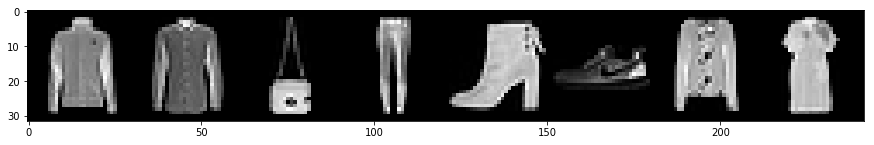

tensor([4, 6, 8, 1, 9, 7, 6, 3])


In [113]:
imshow(torchvision.utils.make_grid(images))
print(labels)

**Let's define the ConvNet** 

In [84]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        
        self.fc1 = nn.Linear(16*4*4,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1,16*4*4)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [90]:
model = ConvNet()

In [91]:
print(model)

ConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [93]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [95]:
n_total_steps = len(train_loader)
print(n_total_steps)

7500


In [100]:
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        
        #Forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        #Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i+1)%4000 == 0:
            print(f'Epoch |{epoch+1}/{num_epochs}|, Step | {i+1}/{n_total_steps}|, Loss: {loss.item():.4f}')
print('Finished Training')

Epoch |1/20|, Step | 4000/7500|, Loss: 0.7701
Epoch |2/20|, Step | 4000/7500|, Loss: 0.5280
Epoch |3/20|, Step | 4000/7500|, Loss: 0.4212
Epoch |4/20|, Step | 4000/7500|, Loss: 0.5710
Epoch |5/20|, Step | 4000/7500|, Loss: 0.1611
Epoch |6/20|, Step | 4000/7500|, Loss: 0.1018
Epoch |7/20|, Step | 4000/7500|, Loss: 0.1532
Epoch |8/20|, Step | 4000/7500|, Loss: 0.3564
Epoch |9/20|, Step | 4000/7500|, Loss: 0.3099
Epoch |10/20|, Step | 4000/7500|, Loss: 0.4966
Epoch |11/20|, Step | 4000/7500|, Loss: 0.5911
Epoch |12/20|, Step | 4000/7500|, Loss: 0.4802
Epoch |13/20|, Step | 4000/7500|, Loss: 0.8906
Epoch |14/20|, Step | 4000/7500|, Loss: 0.4885
Epoch |15/20|, Step | 4000/7500|, Loss: 0.9334
Epoch |16/20|, Step | 4000/7500|, Loss: 0.0514
Epoch |17/20|, Step | 4000/7500|, Loss: 0.4149
Epoch |18/20|, Step | 4000/7500|, Loss: 0.0397
Epoch |19/20|, Step | 4000/7500|, Loss: 0.7240
Epoch |20/20|, Step | 4000/7500|, Loss: 0.2007
Finished Training


In [106]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [107]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc}%')

    for i in range(10):
        acc = 100.0*n_class_correct[i]/n_class_samples[i]
        print(f'Accuracy of {classes[i]}:{acc}%')

Accuracy of the network: 86.4%
Accuracy of T-shirt/top:83.4%
Accuracy of Trouser:95.7%
Accuracy of Pullover:78.3%
Accuracy of Dress:92.9%
Accuracy of Coat:80.1%
Accuracy of Sandal:97.2%
Accuracy of Shirt:53.5%
Accuracy of Sneaker:91.5%
Accuracy of Bag:96.1%
Accuracy of Ankle boot:95.3%


In this model the worst accuracy was Shirt, so to improve the model we have to look how to perform better in this class

## References 
- CNN Image Prediction with PyTorch - Forward Propagation Explained: https://www.youtube.com/watch?v=6vweQjouLEE

- PyTorch Tutorial 14 - Convolutional Neural Network (CNN): https://www.youtube.com/watch?v=pDdP0TFzsoQ&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=14

- FashionMNIST - https://github.com/zalandoresearch/fashion-mnist